In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

#Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
                              ])

#Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [2]:
#Build a feed-forward network
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))

#Define the loss
criterion = nn.CrossEntropyLoss()

#Get our data
images, labels = next(iter(trainloader))
#Flatten images
images = images.view(images.shape[0], -1)

#Forward pass, get our logits
logits = model(images)
#Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3244, grad_fn=<NllLossBackward>)


In [3]:
#ALTERNATIVEY USING LOGSOFTMAX

#TODO: Build a feed-forward network
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

#Define the loss
criterion = nn.NLLLoss()

#Get our data
images, labels = next(iter(trainloader))
#Flatten images
images = images.view(images.shape[0], -1)

#Forward pass, get our logits
logps = model(images)
#Calculate the loss with the logits and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3295, grad_fn=<NllLossBackward>)


# USING LOSS TO PERFORM BACKPROP
    
 #AUTOGRAD   

In [4]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 1.2585,  1.2872],
        [-0.3888, -1.5620]], requires_grad=True)


In [5]:
y = x**2
print(y)

tensor([[1.5838, 1.6569],
        [0.1511, 2.4397]], grad_fn=<PowBackward0>)


In [6]:
##grad_fn shows the function that generated this variable
print(y.grad_fn)

In [7]:
z = y.mean()
print(z)

tensor(1.4579, grad_fn=<MeanBackward1>)


In [8]:
print(x.grad)

None


In [9]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.6292,  0.6436],
        [-0.1944, -0.7810]])
tensor([[ 0.6292,  0.6436],
        [-0.1944, -0.7810]], grad_fn=<DivBackward0>)


# LOSS AND AUTOGRAD TOGETHER

In [10]:
#Build a feed-forward network
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [11]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        [ 0.0055,  0.0055,  0.0055,  ...,  0.0055,  0.0055,  0.0055],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020]])



# USING LOSSES FOR GRADIENTS

In [12]:
from torch import optim

#Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [13]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

#Clear the gradients, do this because gradients are accumulated 
optimizer.zero_grad()

#Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient - ', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0222,  0.0309,  0.0056,  ..., -0.0331,  0.0185, -0.0335],
        [-0.0303,  0.0000,  0.0221,  ...,  0.0028, -0.0091,  0.0185],
        [ 0.0211, -0.0175,  0.0203,  ..., -0.0071, -0.0288, -0.0012],
        ...,
        [ 0.0281, -0.0164, -0.0083,  ...,  0.0192, -0.0124,  0.0196],
        [ 0.0175,  0.0046,  0.0052,  ..., -0.0261, -0.0247,  0.0245],
        [-0.0085, -0.0058, -0.0122,  ...,  0.0213,  0.0274,  0.0273]],
       requires_grad=True)
Gradient -  tensor([[ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [-0.0031, -0.0031, -0.0031,  ..., -0.0031, -0.0031, -0.0031],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        ...,
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009]])


In [14]:
#Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0222,  0.0309,  0.0056,  ..., -0.0331,  0.0185, -0.0335],
        [-0.0302,  0.0000,  0.0222,  ...,  0.0029, -0.0090,  0.0185],
        [ 0.0211, -0.0174,  0.0203,  ..., -0.0071, -0.0288, -0.0012],
        ...,
        [ 0.0281, -0.0164, -0.0083,  ...,  0.0192, -0.0124,  0.0196],
        [ 0.0175,  0.0046,  0.0052,  ..., -0.0261, -0.0246,  0.0245],
        [-0.0084, -0.0058, -0.0122,  ...,  0.0213,  0.0274,  0.0273]],
       requires_grad=True)


In [15]:
#Actaul Training Solution

model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        #TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.911112698283531
Training loss: 0.8539943133018164
Training loss: 0.5221179793320739
Training loss: 0.42942634628398585
Training loss: 0.3858630028583093


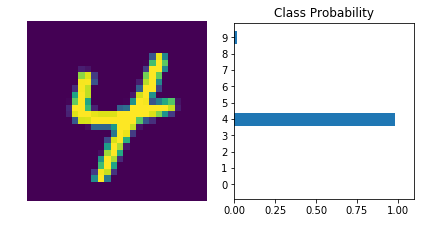

In [16]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
#Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
    
#Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim =1)
helper.view_classify(img.view(1, 28, 28), ps)